<a href="https://colab.research.google.com/github/saurabhIU/Deep-Learning/blob/master/Network_Compression_Using_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Note: I am using latest Tensorflow version 2.0 which was released recently. For network building I am using Keras with custom layers

## Dependencies

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Install Tensorflow 2.0.0

In [3]:

! pip install tensorflow-gpu==2.0.0-alpha0

In [4]:
tf.__version__

'2.0.0-alpha0'

In [0]:

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

##Neural Network with 5 Layers each having 1024 units

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1024,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


## Compile and Fit model

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 20s 341us/sample - loss: 0.0758 - accuracy: 0.9824
Epoch 2/5
60000/60000 [==============================] - 20s 337us/sample - loss: 0.0574 - accuracy: 0.9850
Epoch 3/5
60000/60000 [==============================] - 20s 338us/sample - loss: 0.0460 - accuracy: 0.9876
Epoch 4/5
60000/60000 [==============================] - 20s 333us/sample - loss: 0.0452 - accuracy: 0.9883
Epoch 5/5
60000/60000 [==============================] - 20s 338us/sample - loss: 0.0407 - accuracy: 0.9896


## Evaluate model

In [47]:
loss, acc = model.evaluate(x_test,y_test)

print("Loss {}, Accuracy {}".format(loss, acc))

10000/10000 [==============================] - 1s 125us/sample - loss: 0.1238 - accuracy: 0.9802
Loss 0.12375477882578416, Accuracy 0.9801999926567078


## Singular value decomposition of each dense layer except output layer

In [0]:
#Weights of each layer
layer1_weights = model.get_layer(index=1).get_weights()[0]
layer2_weights = model.get_layer(index=3).get_weights()[0]
layer3_weights = model.get_layer(index=4).get_weights()[0]
layer4_weights = model.get_layer(index=5).get_weights()[0]
layer5_weights = model.get_layer(index=6).get_weights()[0]


#Biases of each layer
layer1_bias = model.get_layer(index=1).get_weights()[1]
layer2_bias = model.get_layer(index=3).get_weights()[1]
layer3_bias = model.get_layer(index=4).get_weights()[1]
layer4_bias = model.get_layer(index=5).get_weights()[1]
layer5_bias = model.get_layer(index=6).get_weights()[1]

In [0]:
s1, u1, v1 = tf.linalg.svd(layer1_weights )
s2, u2, v2 = tf.linalg.svd(layer2_weights )
s3, u3, v3 = tf.linalg.svd(layer3_weights )
s4, u4, v4 = tf.linalg.svd(layer4_weights )
s5, u5, v5 = tf.linalg.svd(layer5_weights )

In [0]:
D_Values = [10,20,50,100,200,784]
test_accuracies = []

## Compress weights with D = 10

In [0]:
D = 10

W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []

W_L1 = tf.matmul(u1[:,0:D], tf.matmul(tf.linalg.diag(s1)[0:D,0:D], v1[:,0:D], adjoint_b=True))
W_L2 = tf.matmul(u2[:,0:D], tf.matmul(tf.linalg.diag(s2)[0:D,0:D], v2[:,0:D], adjoint_b=True))
W_L3 = tf.matmul(u3[:,0:D], tf.matmul(tf.linalg.diag(s3)[0:D,0:D], v3[:,0:D], adjoint_b=True))
W_L4 = tf.matmul(u4[:,0:D], tf.matmul(tf.linalg.diag(s4)[0:D,0:D], v4[:,0:D], adjoint_b=True))
W_L5 = tf.matmul(u5[:,0:D], tf.matmul(tf.linalg.diag(s5)[0:D,0:D], v5[:,0:D], adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [56]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)
print("Loss {}, Accuracy {}".format(loss, acc))

10000/10000 [==============================] - 1s 120us/sample - loss: 1.8959 - accuracy: 0.4507
Loss 1.8958821159362793, Accuracy 0.4507000148296356


## Compress weights with D = 20

In [0]:
D = 20

W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []

W_L1 = tf.matmul(u1[:,0:D], tf.matmul(tf.linalg.diag(s1)[0:D,0:D], v1[:,0:D], adjoint_b=True))
W_L2 = tf.matmul(u2[:,0:D], tf.matmul(tf.linalg.diag(s2)[0:D,0:D], v2[:,0:D], adjoint_b=True))
W_L3 = tf.matmul(u3[:,0:D], tf.matmul(tf.linalg.diag(s3)[0:D,0:D], v3[:,0:D], adjoint_b=True))
W_L4 = tf.matmul(u4[:,0:D], tf.matmul(tf.linalg.diag(s4)[0:D,0:D], v4[:,0:D], adjoint_b=True))
W_L5 = tf.matmul(u5[:,0:D], tf.matmul(tf.linalg.diag(s5)[0:D,0:D], v5[:,0:D], adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [60]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)

print("Loss {}, Accuracy {}".format(loss, acc))

10000/10000 [==============================] - 1s 120us/sample - loss: 0.6183 - accuracy: 0.8712
Loss 0.6182540518283844, Accuracy 0.8712000250816345


## Compress weights with D = 50

In [0]:
D = 50
W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []
W_L1 = tf.matmul(u1[:,0:D], tf.matmul(tf.linalg.diag(s1)[0:D,0:D], v1[:,0:D], adjoint_b=True))
W_L2 = tf.matmul(u2[:,0:D], tf.matmul(tf.linalg.diag(s2)[0:D,0:D], v2[:,0:D], adjoint_b=True))
W_L3 = tf.matmul(u3[:,0:D], tf.matmul(tf.linalg.diag(s3)[0:D,0:D], v3[:,0:D], adjoint_b=True))
W_L4 = tf.matmul(u4[:,0:D], tf.matmul(tf.linalg.diag(s4)[0:D,0:D], v4[:,0:D], adjoint_b=True))
W_L5 = tf.matmul(u5[:,0:D], tf.matmul(tf.linalg.diag(s5)[0:D,0:D], v5[:,0:D], adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [64]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)
print("Loss {}, Accuracy {}".format(loss, acc))

10000/10000 [==============================] - 1s 122us/sample - loss: 0.1382 - accuracy: 0.9768
Loss 0.13819042009264232, Accuracy 0.9768000245094299


## Compress weights with D = 100

In [0]:
D = 100

W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []
W_L1 = tf.matmul(u1[:,0:D], tf.matmul(tf.linalg.diag(s1)[0:D,0:D], v1[:,0:D], adjoint_b=True))
W_L2 = tf.matmul(u2[:,0:D], tf.matmul(tf.linalg.diag(s2)[0:D,0:D], v2[:,0:D], adjoint_b=True))
W_L3 = tf.matmul(u3[:,0:D], tf.matmul(tf.linalg.diag(s3)[0:D,0:D], v3[:,0:D], adjoint_b=True))
W_L4 = tf.matmul(u4[:,0:D], tf.matmul(tf.linalg.diag(s4)[0:D,0:D], v4[:,0:D], adjoint_b=True))
W_L5 = tf.matmul(u5[:,0:D], tf.matmul(tf.linalg.diag(s5)[0:D,0:D], v5[:,0:D], adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [68]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)

10000/10000 [==============================] - 1s 122us/sample - loss: 0.1061 - accuracy: 0.9793


## Compress weights with D = 200

In [0]:
D = 200

W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []
W_L1 = tf.matmul(u1[:,0:D], tf.matmul(tf.linalg.diag(s1)[0:D,0:D], v1[:,0:D], adjoint_b=True))
W_L2 = tf.matmul(u2[:,0:D], tf.matmul(tf.linalg.diag(s2)[0:D,0:D], v2[:,0:D], adjoint_b=True))
W_L3 = tf.matmul(u3[:,0:D], tf.matmul(tf.linalg.diag(s3)[0:D,0:D], v3[:,0:D], adjoint_b=True))
W_L4 = tf.matmul(u4[:,0:D], tf.matmul(tf.linalg.diag(s4)[0:D,0:D], v4[:,0:D], adjoint_b=True))
W_L5 = tf.matmul(u5[:,0:D], tf.matmul(tf.linalg.diag(s5)[0:D,0:D], v5[:,0:D], adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [72]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)

10000/10000 [==============================] - 1s 119us/sample - loss: 0.1145 - accuracy: 0.9795


## Compress weights with D = 784

In [0]:
D = 784

W1_New , W2_New, W3_New, W4_New, W5_New = [] , [], [], [], []
W_L1 = tf.matmul(u1, tf.matmul(tf.linalg.diag(s1), v1, adjoint_b=True))
W_L2 = tf.matmul(u2, tf.matmul(tf.linalg.diag(s2), v2, adjoint_b=True))
W_L3 = tf.matmul(u3, tf.matmul(tf.linalg.diag(s3), v3, adjoint_b=True))
W_L4 = tf.matmul(u4, tf.matmul(tf.linalg.diag(s4), v4, adjoint_b=True))
W_L5 = tf.matmul(u5, tf.matmul(tf.linalg.diag(s5), v5, adjoint_b=True))

In [0]:
W1_New.append(W_L1)
W1_New.append(layer1_bias)

W2_New.append(W_L2)
W2_New.append(layer2_bias)

W3_New.append(W_L3)
W3_New.append(layer3_bias)

W4_New.append(W_L4)
W4_New.append(layer4_bias)

W5_New.append(W_L5)
W5_New.append(layer5_bias)

In [0]:
model.get_layer(index=1).set_weights(W1_New)
model.get_layer(index=3).set_weights(W2_New)
model.get_layer(index=4).set_weights(W3_New)
model.get_layer(index=5).set_weights(W4_New)
model.get_layer(index=6).set_weights(W5_New)

In [76]:
loss, acc = model.evaluate(x_test,y_test)
test_accuracies.append(acc)

10000/10000 [==============================] - 1s 120us/sample - loss: 0.1238 - accuracy: 0.9802


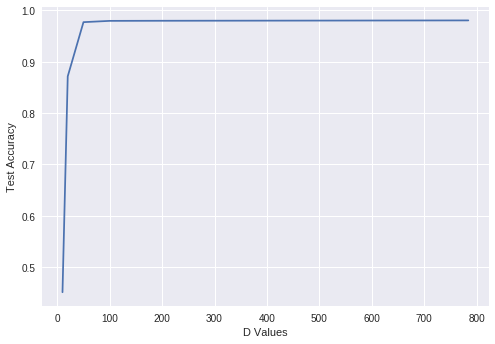

In [77]:
plt.plot(D_Values,test_accuracies)
plt.ylabel('Test Accuracy')
plt.xlabel('D Values')
plt.show()